In [2]:
import pandas as pd 
music = pd.read_csv('data.csv')
music.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349943,1.935690,1784.420446,2002.650192,3806.485316,0.083066,-113.596742,121.557302,-19.158825,...,8.810668,-3.667367,5.751690,-5.162761,0.750947,-1.691937,-0.409954,-2.300208,1.219928,blues
1,blues.00001.wav,0.340983,-0.058070,1529.835316,2038.617579,3548.820207,0.056044,-207.556796,124.006717,8.930562,...,5.376802,-2.239119,4.216963,-6.012273,0.936109,-0.716537,0.293875,-0.287431,0.531573,blues
2,blues.00002.wav,0.363603,1.033480,1552.481958,1747.165985,3040.514948,0.076301,-90.754394,140.459907,-29.109965,...,5.789265,-8.905224,-1.083720,-9.218359,2.455805,-7.726901,-1.815724,-3.433434,-2.226821,blues
3,blues.00003.wav,0.404779,0.078957,1070.119953,1596.333948,2185.028454,0.033309,-199.431144,150.099218,5.647594,...,6.087676,-2.476420,-1.073890,-2.874777,0.780976,-3.316932,0.637981,-0.619690,-3.408233,blues
4,blues.00004.wav,0.308590,-8.457873,1835.494603,1748.362448,3580.945013,0.101500,-160.266031,126.198800,-35.605448,...,-2.806385,-6.934122,-7.558619,-9.173552,-4.512166,-5.453538,-0.924162,-4.409333,-11.703781,blues


In [3]:
# dropping the filename column as it is not useful
music.drop('filename' , axis=1, inplace=True)

In [4]:
# dropping the feature rmse column
music.drop('rmse' , axis=1, inplace=True)


In [5]:
X = pd.DataFrame(music.iloc[:, :-1])
Y = pd.DataFrame(music.iloc[:,-1])
X.head()

,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.349943,1784.420446,2002.650192,3806.485316,0.083066,-113.596742,121.557302,-19.158825,42.351029,-6.376457,...,-8.324323,8.810668,-3.667367,5.751690,-5.162761,0.750947,-1.691937,-0.409954,-2.300208,1.219928
1,0.340983,1529.835316,2038.617579,3548.820207,0.056044,-207.556796,124.006717,8.930562,35.874684,2.916038,...,-5.560387,5.376802,-2.239119,4.216963,-6.012273,0.936109,-0.716537,0.293875,-0.287431,0.531573
2,0.363603,1552.481958,1747.165985,3040.514948,0.076301,-90.754394,140.459907,-29.109965,31.689014,-13.987036,...,-13.123111,5.789265,-8.905224,-1.083720,-9.218359,2.455805,-7.726901,-1.815724,-3.433434,-2.226821
3,0.404779,1070.119953,1596.333948,2185.028454,0.033309,-199.431144,150.099218,5.647594,26.871927,1.754463,...,-3.196314,6.087676,-2.476420,-1.073890,-2.874777,0.780976,-3.316932,0.637981,-0.619690,-3.408233
4,0.308590,1835.494603,1748.362448,3580.945013,0.101500,-160.266031,126.198800,-35.605448,22.153301,-32.489270,...,-13.083820,-2.806385,-6.934122,-7.558619,-9.173552,-4.512166,-5.453538,-0.924162,-4.409333,-11.703781


In [6]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
music['label']= label_encoder.fit_transform(music['label']) 
music['label'].unique() 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [7]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=80)

In [8]:
from sklearn.linear_model import LogisticRegression 

logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)

C:\Users\Ayushi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ayushi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ayushi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
from sklearn.metrics import accuracy_score
Y_pred = logmodel.predict(X_test)
print( accuracy_score(Y_test, Y_pred))

0.64


In [10]:
#confusion matrix
from sklearn.metrics import confusion_matrix 
confmat = confusion_matrix(Y_test,Y_pred)
print(confmat)

[[ 3  0  3  1  0  0  0  0  0  1]
 [ 0  5  0  0  0  0  0  0  0  0]
 [ 2  0  7  1  0  0  0  0  0  1]
 [ 0  1  2  9  1  0  1  0  0  1]
 [ 0  0  1  1  5  0  0  0  2  0]
 [ 0  0  1  0  0  7  0  0  0  0]
 [ 1  0  0  0  0  0 12  0  0  2]
 [ 0  0  0  1  1  0  0 10  0  0]
 [ 2  0  1  1  3  0  0  0  2  1]
 [ 3  0  0  0  0  0  0  0  0  4]]


Text(69.0, 0.5, 'music labels')

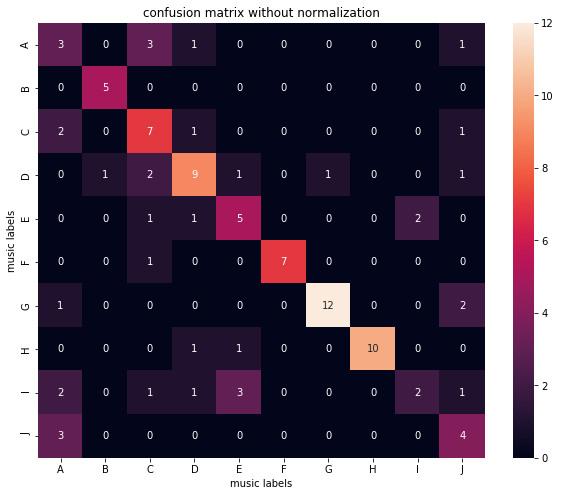

In [12]:
#heatmap of confusion matrix
import numpy as np
#from numpy import linalg as LA 
import seaborn as sn
import matplotlib.pyplot as plt 

df_cm = pd.DataFrame(confmat , index = [i for i in "ABCDEFGHIJ"] , columns = [i for i in "ABCDEFGHIJ"])
plt.figure(figsize = (10,8))
plt.title('confusion matrix without normalization')
ax = sn.heatmap(df_cm, annot= True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel("music labels")
plt.ylabel("music labels")